In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Exploratory Data Analysis

In [3]:
df = pd.read_csv('TradingIntern.WS.data.csv')

In [72]:
df.head

<bound method NDFrame.head of       Unnamed: 0 symbol            datetime     volume  midpoint
0              1   FAST 2022-03-01 09:45:00   158430.2    51.505
1              2   FAST 2022-03-01 10:00:00   337332.3    51.380
2              3   FAST 2022-03-01 10:15:00   292177.5    51.620
3              4   FAST 2022-03-01 10:30:00    97747.0    51.575
4              5   FAST 2022-03-01 10:45:00   101527.2    51.160
...          ...    ...                 ...        ...       ...
5975        5976   SPCE 2022-03-31 15:00:00   113536.0    10.055
5976        5977   SPCE 2022-03-31 15:15:00   335403.4     9.985
5977        5978   SPCE 2022-03-31 15:30:00   206569.4     9.965
5978        5979   SPCE 2022-03-31 15:45:00   378415.0     9.935
5979        5980   SPCE 2022-03-31 16:00:00  1014733.4     9.885

[5980 rows x 5 columns]>

In [16]:
df.drop(columns = {'Unnamed: 0'}, axis=1)

,symbol,datetime,volume,midpoint
0,FAST,2022-03-01 9:45:00,158430.2,51.505
1,FAST,2022-03-01 10:00:00,337332.3,51.380
2,FAST,2022-03-01 10:15:00,292177.5,51.620
3,FAST,2022-03-01 10:30:00,97747.0,51.575
4,FAST,2022-03-01 10:45:00,101527.2,51.160
...,...,...,...,...
5975,SPCE,2022-03-31 15:00:00,113536.0,10.055
5976,SPCE,2022-03-31 15:15:00,335403.4,9.985
5977,SPCE,2022-03-31 15:30:00,206569.4,9.965
5978,SPCE,2022-03-31 15:45:00,378415.0,9.935


In [19]:
df['symbol'].unique()

array(['FAST', 'WBA', 'AAPL', 'MS', 'CVX', 'JPM', 'XOM', 'TSLA', 'JD',
       'SPCE'], dtype=object)

In [27]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['datetime']

0      2022-03-01 09:45:00
1      2022-03-01 10:00:00
2      2022-03-01 10:15:00
3      2022-03-01 10:30:00
4      2022-03-01 10:45:00
               ...        
5975   2022-03-31 15:00:00
5976   2022-03-31 15:15:00
5977   2022-03-31 15:30:00
5978   2022-03-31 15:45:00
5979   2022-03-31 16:00:00
Name: datetime, Length: 5980, dtype: datetime64[ns]

Text(0, 0.5, 'Midpoint')

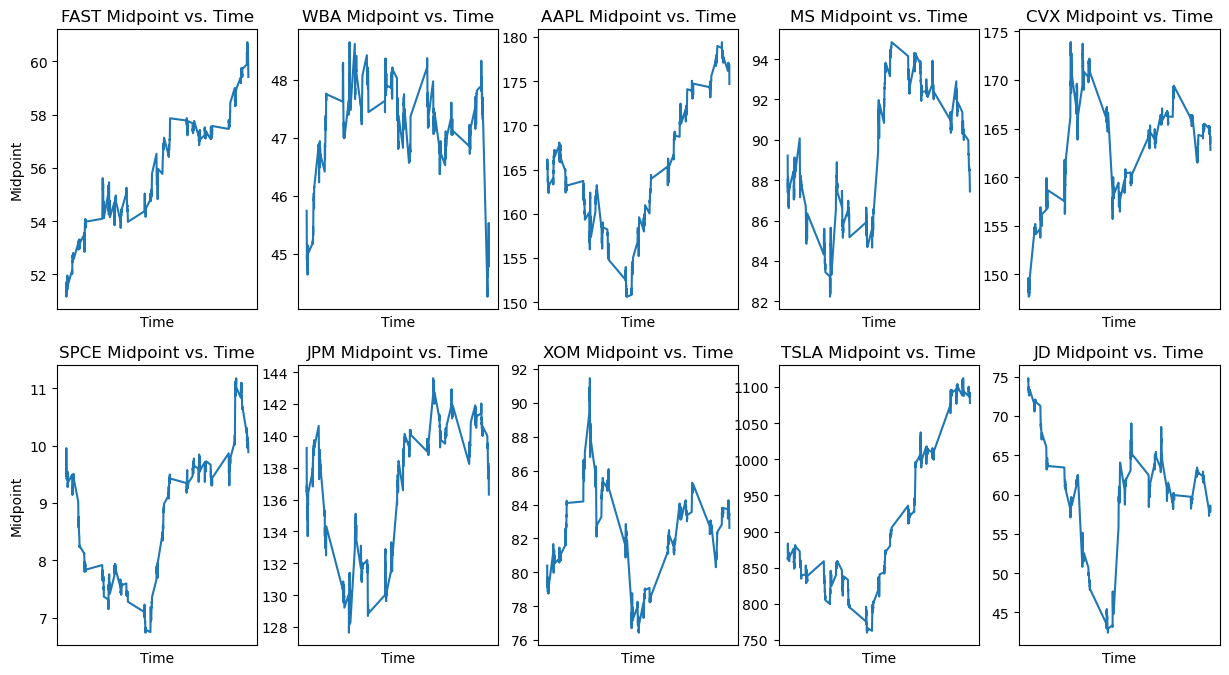

In [71]:
stocks = list(df['symbol'].unique())

fig, axs = plt.subplots(2, 5, figsize=(15, 8))
i = 0

for stock in stocks:
    x = df['datetime'].loc[df['symbol'] == stock]
    y = df['midpoint'].loc[df['symbol'] == stock]

    if i < 5:
        axs[0, i].plot(x, y)
        axs[0, i].set_title(stock + " Midpoint vs. Time")
        axs[0, i].set_xticks([])
    else:
        axs[1, (i+1)%5].plot(x, y)
        axs[1, (i+1)%5].set_title(stock + " Midpoint vs. Time")
        axs[1, (i+1)%5].set_xticks([])
    i += 1


for ax in axs.flat:
    ax.set(xlabel='Time')

axs[0, 0].set_ylabel('Midpoint') 
axs[1, 0].set_ylabel('Midpoint') 

# Momentum Indicators
## FAST, AAPL, 